In [21]:
readme_content = """
**Nama:** Dimas Daffa Ernanda
**NIM:** A11.2022.14079
**Topik:** Analisis Sentimen Review Makanan Amazon
"""
print(readme_content)


**Nama:** Dimas Daffa Ernanda  
**NIM:** A11.2022.14079  
**Topik:** Analisis Sentimen Review Makanan Amazon  



In [3]:
!pip install -q kaggle

In [5]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle datasets list

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
valakhorasani/mobile-device-usage-and-user-behavior-dataset  Mobile Device Usage and User Behavior Dataset   11KB  2024-09-28 20:21:12          16328        357  1.0              
valakhorasani/gym-members-exercise-dataset                   Gym Members Exercise Dataset                    22KB  2024-10-06 11:27:38           8987        147  1.0              
taweilo/loan-approval-classification-data                    Loan Approval Classification Dataset           751KB  2024-10-29 04:07:34            706         23  1.0              
octopusteam/full-netflix-dataset                             Full Netflix Dataset                   

In [7]:
!kaggle datasets download -d snap/amazon-fine-food-reviews


Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0
 94% 227M/242M [00:01<00:00, 219MB/s]
100% 242M/242M [00:01<00:00, 215MB/s]


In [8]:
!unzip amazon-fine-food-reviews.zip


Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [9]:
import pandas as pd
data = pd.read_csv("Reviews.csv")
data.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
data.shape

(568454, 10)

In [11]:
# Check null values
data.isna().sum().to_frame(name='# of missing values')

,# of missing values
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [13]:
#Hapus Row Null
import numpy as np
total_rows =  data.shape[0]
data.dropna(how='any',inplace=True)
remaining_rows= data.shape[0]

removed_rows = total_rows-remaining_rows
print("No. of rows removed :", removed_rows)

print(f"\nPercentage of data removed:{np.round((removed_rows/total_rows)*100,2)}%")
print(f"Percentage of data remaining:{np.round((remaining_rows/total_rows)*100,2)}%")

No. of rows removed : 0

Percentage of data removed:0.0%
Percentage of data remaining:100.0%


In [14]:
#Hapus Row Duplicate
a =  data.shape[0]
data.drop_duplicates(inplace=True, subset=['Score','Text'])
b = data.shape[0]

print("No. of rows removed :", a-b)

print(f"\nPercentage of data removed: {np.round(((a-b)/total_rows)*100,2)}%")
print(f"Percentage of data remaining: {np.round((b/total_rows)*100,2)}%")

No. of rows removed : 174745

Percentage of data removed: 30.74%
Percentage of data remaining: 69.26%


In [15]:
#Hapus Outliers
a =  data.shape[0]

idx = data[data["HelpfulnessNumerator"]>data["HelpfulnessDenominator"]].index
data.drop(index=idx, inplace=True)

b = data.shape[0]

print("No. of rows removed :", a-b)

print(f"\nPercentage of data removed:{np.round(((a-b)/total_rows)*100,2)}%")
print(f"Percentage of data remaining:{np.round((b/total_rows)*100,2)}%")

No. of rows removed : 2

Percentage of data removed:0.0%
Percentage of data remaining:69.26%


In [22]:
#Create target column using Score
## `Score` > 3 : "Positive"
## `Score` == 3 : "Neutral"
## `Score` < 3 : "Negative"

def create_target(x):

    return "Positive" if x>3 else "Negative" if x<3 else "Neutral"

data.loc[:, 'target'] = data.Score.apply(create_target)

# target column
data[['Score', 'target']].sample(5)

,Score,target
387461,5,Positive
82543,5,Positive
411067,4,Positive
550801,5,Positive
6058,1,Negative


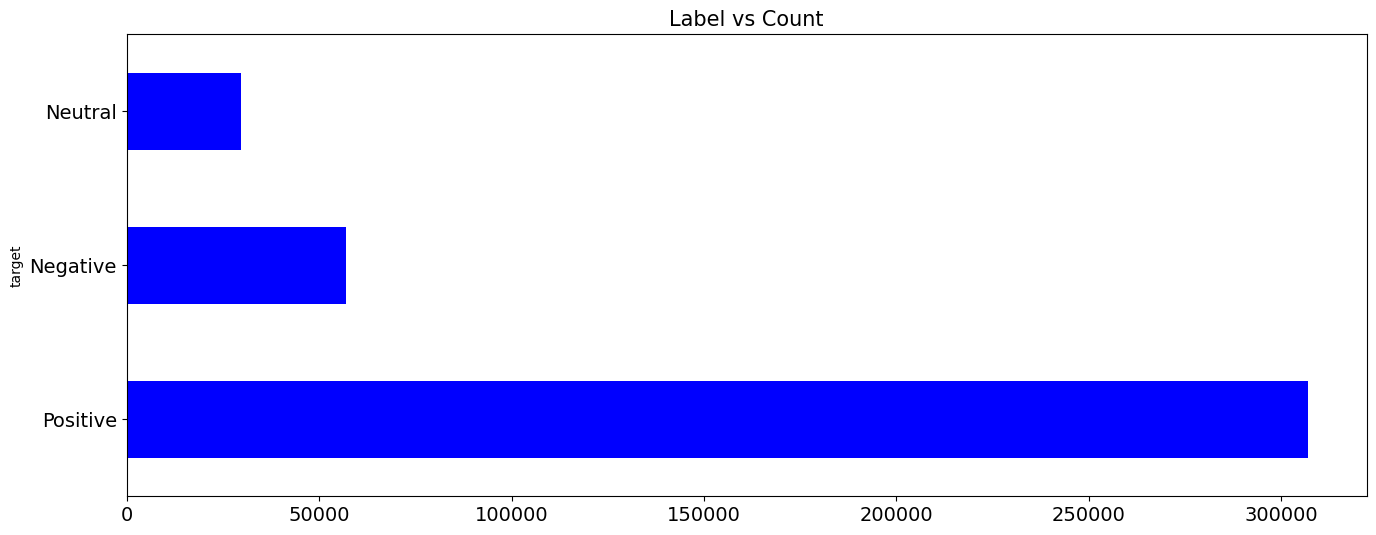

In [24]:
#Target distribution (Before)
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 6))

vc = data.target.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [25]:
#Down sampling (remove some positive and negative reviews)
neutral = data.loc[data.target=="Neutral"] # 29770 reviews

positive = data.loc[data.target=="Positive"].sample(50000)

negative = data.loc[data.target=="Negative"].sample(50000)

data = pd.concat([positive, negative, neutral])
data.shape

(129770, 11)

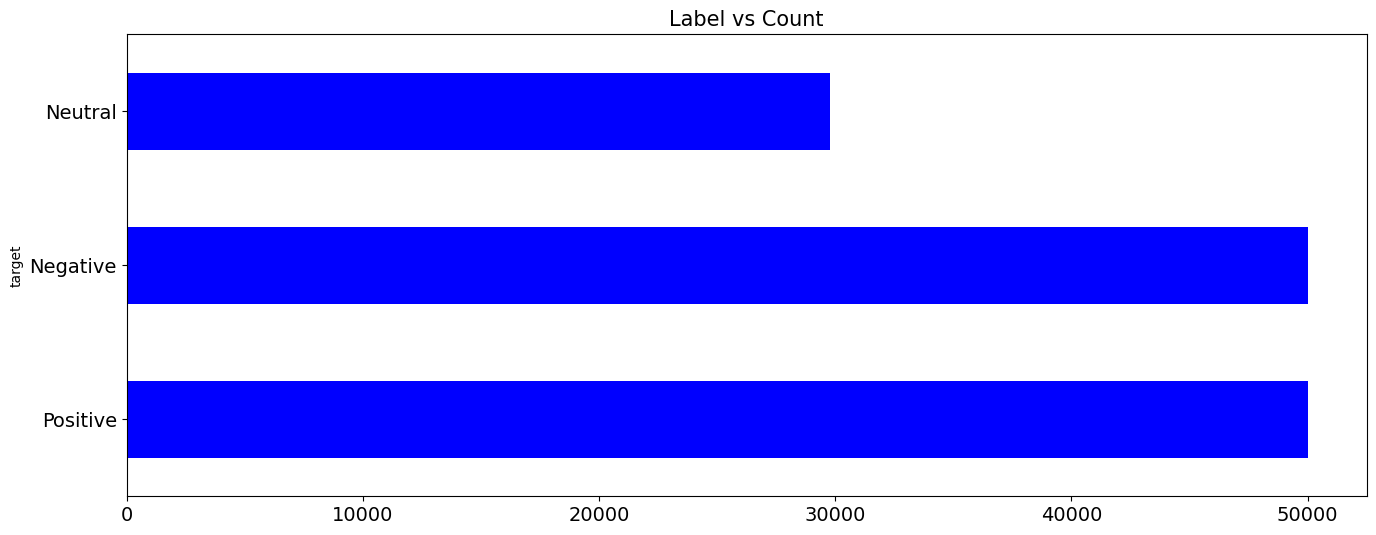

In [26]:
#Target distribution (After)
fig, ax = plt.subplots(figsize=(16, 6))

vc = data.target.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [29]:
#Stop Words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
#Stop Words
from nltk.corpus import stopwords

# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

#
final_stopwords.add("one")
print(final_stopwords)



{'how', 'up', 'having', 'will', 'with', 'this', 'ma', 'wouldn', 'where', 'any', 'themselves', 'few', 'needn', "you'll", 'have', 'couldn', 'aren', 'she', 'her', "you've", 'when', 'at', 'o', 'were', 'which', 'while', 'they', "she's", 'their', 'me', 'ourselves', 'own', 'because', 'an', 'haven', 'once', 'too', 'through', 'whom', 'some', 'until', 'between', 'why', 'those', 'during', 'hasn', 'does', 'theirs', 'there', 'before', 'had', 'of', 'from', 'm', 'again', 'ain', 'himself', 'mustn', 'isn', 'all', 'shan', 'out', 'same', 'and', 'here', "should've", 'your', 'weren', 'over', 'a', 're', 'am', 'our', 'into', 'doesn', 'd', 'as', 'to', 'hers', 'about', 'has', 'off', 'what', 'down', 'are', 'can', 'that', 'then', 'didn', 'yours', 'i', 'being', 'ours', 'did', 'so', 'don', 'them', 'mightn', 'yourselves', 'doing', 'if', 'is', 'his', 'further', 'the', 'under', 'or', 'we', "you'd", 'won', 'do', 'such', 'was', 's', 'he', 'y', 'after', 'be', 'myself', 'by', 'itself', 'on', 'should', "that'll", 'below',

In [34]:
#Remove unwanted words from reviews¶
#Ex. html tags, punctuation, stop words, etc..
import re
import string
from nltk.stem import PorterStemmer

# Inisialisasi objek stemming
stemmer = PorterStemmer()

# ---------------------------------------------
HTMLTAGS = re.compile('<.*?>')  # Pola untuk menghapus tag HTML
table = str.maketrans(dict.fromkeys(string.punctuation))  # Hapus tanda baca
remove_digits = str.maketrans('', '', string.digits)  # Hapus angka
MULTIPLE_WHITESPACE = re.compile(r"\s+")  # Hapus spasi berlebih
# ---------------------------------------------


In [35]:
def preprocessor(review):
    # remove html tags
    review = HTMLTAGS.sub(r'', review)

    # remove puncutuation
    review = review.translate(table)

    # remove digits
    review = review.translate(remove_digits)

    # lower case all letters
    review = review.lower()

    # replace multiple white spaces with single space
    review = MULTIPLE_WHITESPACE.sub(" ", review).strip()

    # remove stop words
    review = [word for word in review.split()
              if word not in final_stopwords]

    # stemming
    review = ' '.join([stemmer.stem(word) for word in review])

    return review

In [36]:
print("Before preprocessing : ")
data.Text.iloc[6]

Before preprocessing : 


'This is the best salad dressing in the world and I have been using it for approximately 48 years or ever since it came out.  I love that I am still able to get this dressing as it is the only one that I really love.'

In [37]:
# apply preprocessing function

data.Text = data.Text.apply(preprocessor)
print("After preprocessing : ")
data.Text.iloc[6]

After preprocessing : 


'best salad dress world use approxim year ever sinc came love still abl get dress realli love'

In [38]:
def generate_wcloud(text):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(text)

    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

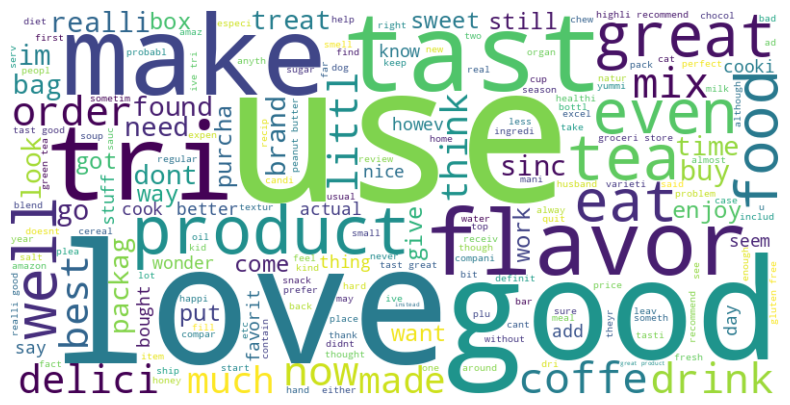

In [40]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Fungsi untuk menghasilkan word cloud
def generate_wcloud(text):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400)
    wordcloud.generate(text)

    # Menampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Membuat word cloud untuk ulasan positif
pos = data.loc[data.target == "Positive"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)


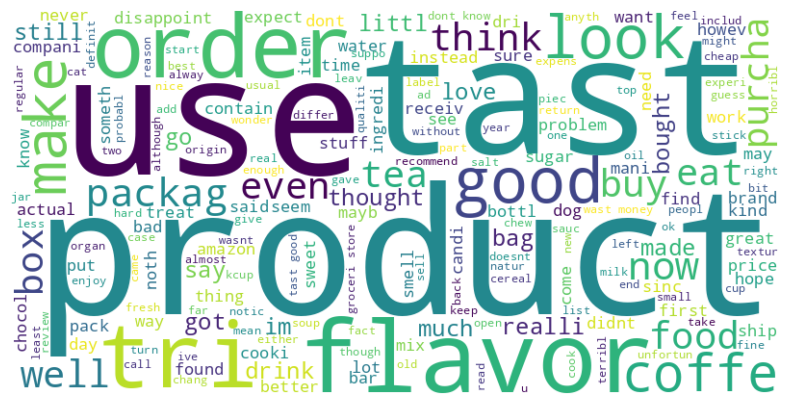

In [41]:
#Word cloud for Negative reviews
pos = data.loc[data.target=="Negative"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

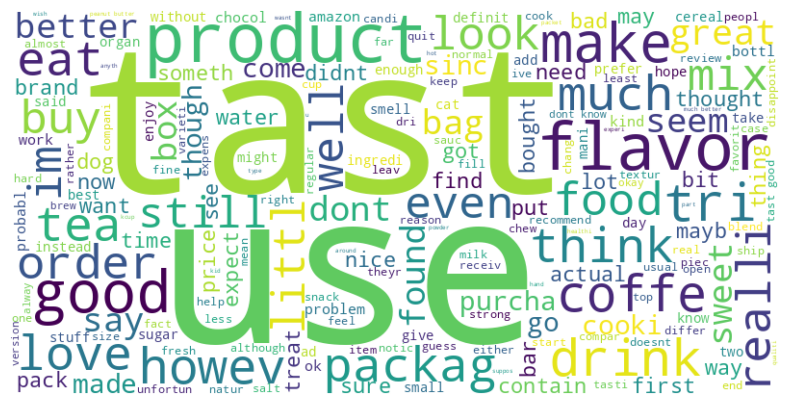

In [42]:
#Word cloud for Neutral reviews
pos = data.loc[data.target=="Neutral"].Text
text = " ".join(review for review in pos.astype(str))

generate_wcloud(text)

In [45]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi Train (70%) dan Test (30%)
X = data.Text
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)


In [46]:
X_train.shape, X_test.shape

((90839,), (38931,))

In [48]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag of Words Vectorizer
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)

# Transform data
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)

# Transform data
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)


In [53]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
labelEncoder = LabelEncoder()

y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)

# Menampilkan kelas
labels = labelEncoder.classes_.tolist()
print(labels)  # index -> class


['Negative', 'Neutral', 'Positive']


In [54]:
###
def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    # evaluation
    print()
    print(model)
    print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")
    print('\n',40*'-')

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C:
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)

    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)



LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.6978390338951331
Test accuracy score : 0.6916596028871593

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.7380530388929865
Test accuracy score : 0.7162415555726799

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.7691410077169498
Test accuracy score : 0.7159846908633223

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.7928973238366781
Test accuracy score : 0.7021139965580129

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.8014289016831977
Test accuracy score : 0.6887827181423544

 ----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
#Naive Bayes Classifier with BoW
from sklearn.naive_bayes import MultinomialNB
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas:
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(



MultinomialNB(alpha=0)
Train accuracy score : 0.7129426788053589
Test accuracy score : 0.6842875857285967

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.7115666178623719
Test accuracy score : 0.6858287739847423

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.7109941765100892
Test accuracy score : 0.6860599522231641

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.7106639218837724
Test accuracy score : 0.6863681898743932

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.7104327436453506
Test accuracy score : 0.6864452492872004

 ----------------------------------------


In [60]:
#Logistic Regression with Tf-Idf
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C:
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)

    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.6456257774744328
Test accuracy score : 0.6453982687318589

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.6747212100529508
Test accuracy score : 0.6736277002902571

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.7304021400499785
Test accuracy score : 0.7161388096889368

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.7651339182509715
Test accuracy score : 0.7233053350800134

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.790244278338599
Test accuracy score : 0.7080732578151088

 ----------------------------------------


In [61]:
#Naive Bayes classifier with Tf-Idf
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas:
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(



MultinomialNB(alpha=0)
Train accuracy score : 0.7192615506555554
Test accuracy score : 0.6820014898153143

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.716124131705545
Test accuracy score : 0.6848783745601191

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.7130857891434296
Test accuracy score : 0.6856746551591277

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.7117757791257059
Test accuracy score : 0.685957206339421

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.7102345908695604
Test accuracy score : 0.6856232822172562

 ----------------------------------------


In [62]:
def plot_cm(y_true, y_pred):
    plt.figure(figsize=(6,6))

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)

    return plt.show()

In [63]:
#Best model : Logistic Regression(C=1) with TfIdf data
bmodel = LogisticRegression(C=1, max_iter=500, random_state=1)
bmodel.fit(tfidf_X_train, y_train)

LogisticRegression(C=1, max_iter=500, random_state=1)

In [64]:
# predictions
y_preds_train = bmodel.predict(tfidf_X_train)
y_preds_test = bmodel.predict(tfidf_X_test)
# accuracy
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")

Train accuracy score : 0.7651339182509715
Test accuracy score : 0.7233053350800134


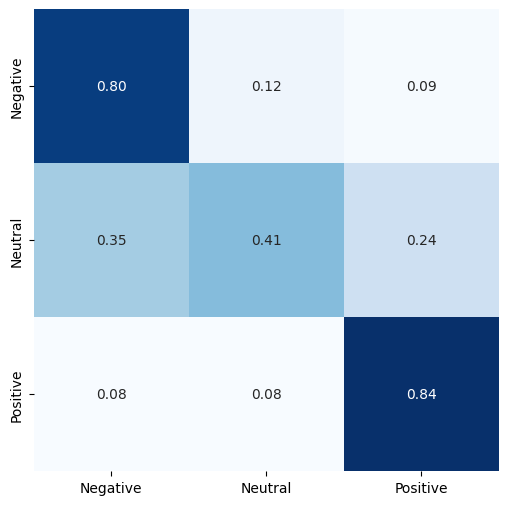

In [69]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
plot_cm(y_test, y_preds_test)

In [71]:
import pickle

# Simpan model dan transformer
with open("transformer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

with open("model.pkl", "wb") as f:
    pickle.dump(bmodel, f)


In [72]:
#Prediksi Review
# labels = ['Negative', 'Neutral', 'Positive']
def get_sentiment(review):
    # preprocessing
    x = preprocessor(review)
    #vectorization
    x = tfidf_vectorizer.transform([x])
    #prediction
    y = int(bmodel.predict(x.reshape(1,-1)))
    return labels[y]

In [73]:
# positve review
review = "This chips packet is very tasty. I highly recommend this!"
print(f"This is a {get_sentiment(review)} review!")

This is a Positive review!


<ipython-input-72-1b94a0484eda>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = int(bmodel.predict(x.reshape(1,-1)))


In [74]:
# negative review
review = "This product is a waste of money. Don't buy this!!"
print(f"This is a {get_sentiment(review)} review!")

This is a Negative review!


<ipython-input-72-1b94a0484eda>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y = int(bmodel.predict(x.reshape(1,-1)))
